## Creating a model to predict the Quality of Wine

In [1]:
import os

## Load the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Perform basic data quality checks

In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
df.duplicated().sum()

0

No missing values and no duplicated rows in this dataset

### Descriptive Analysis

#### Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Statistical Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


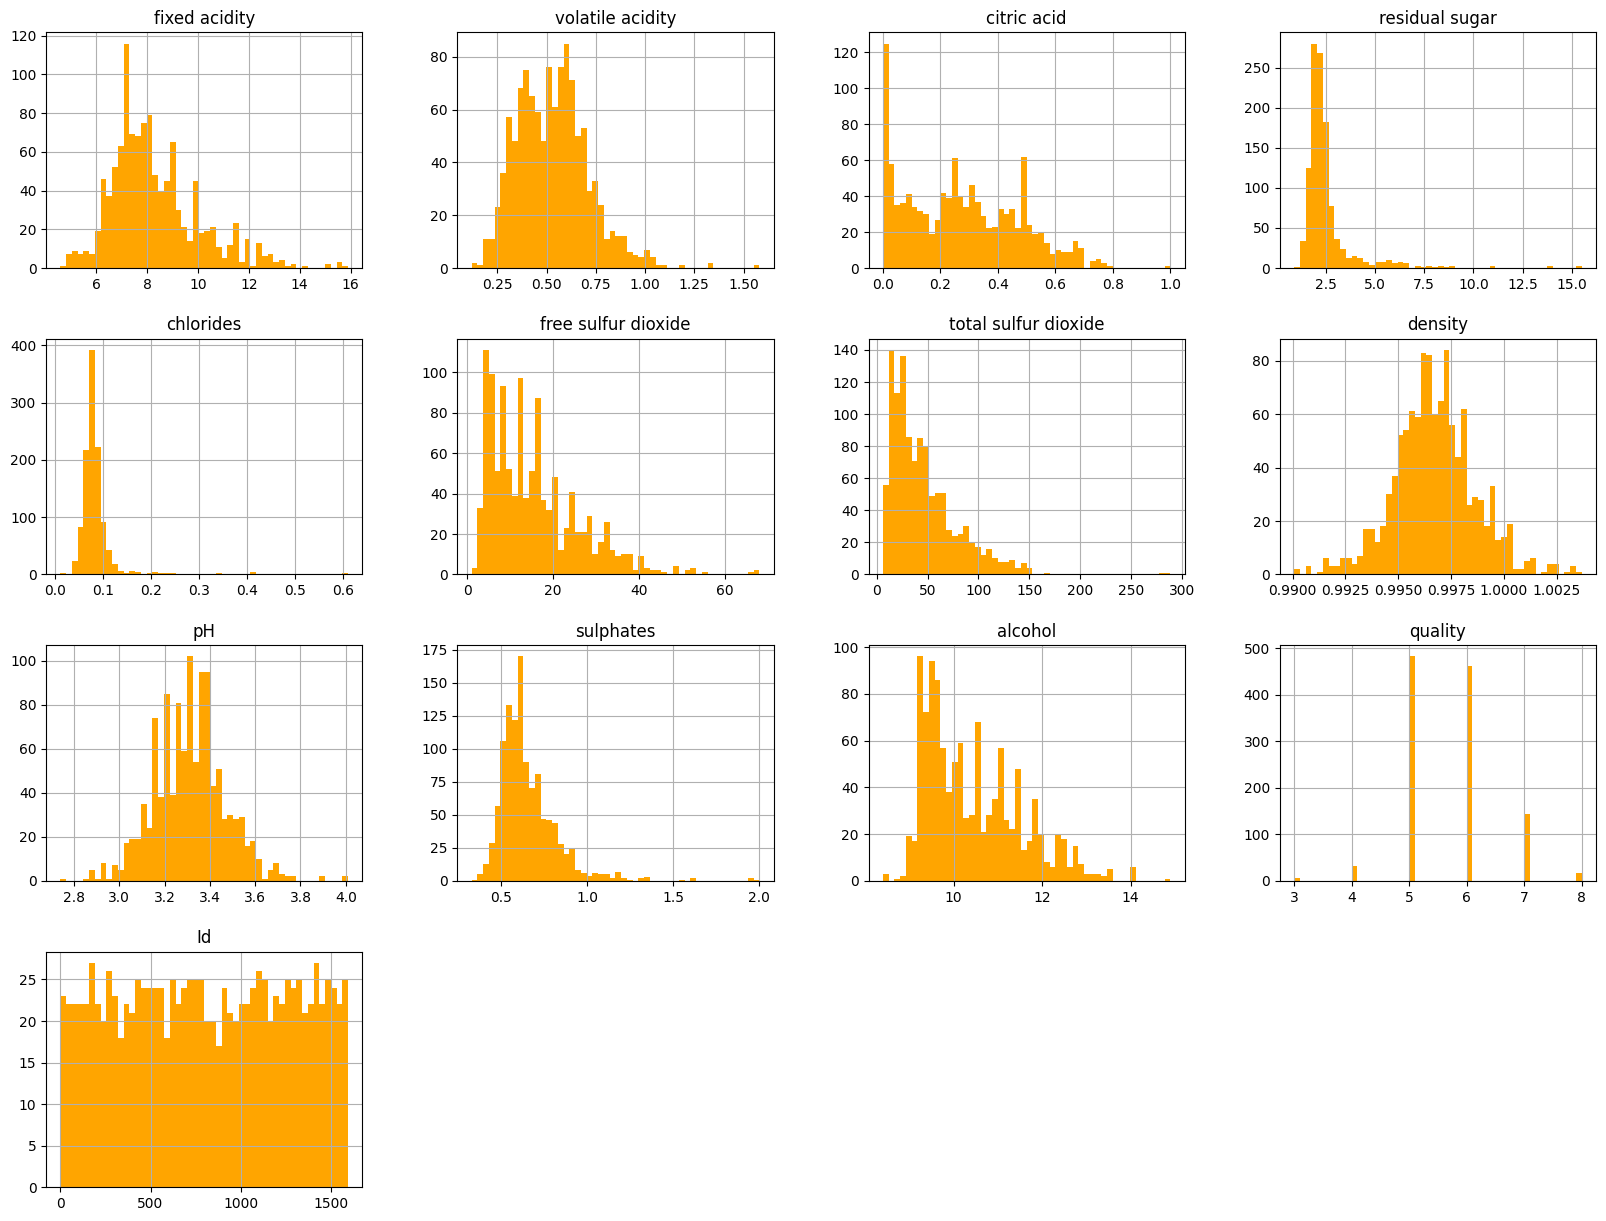

In [7]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

### The data appears to be right skewed. Lets handle this skeweness using Log Transform

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

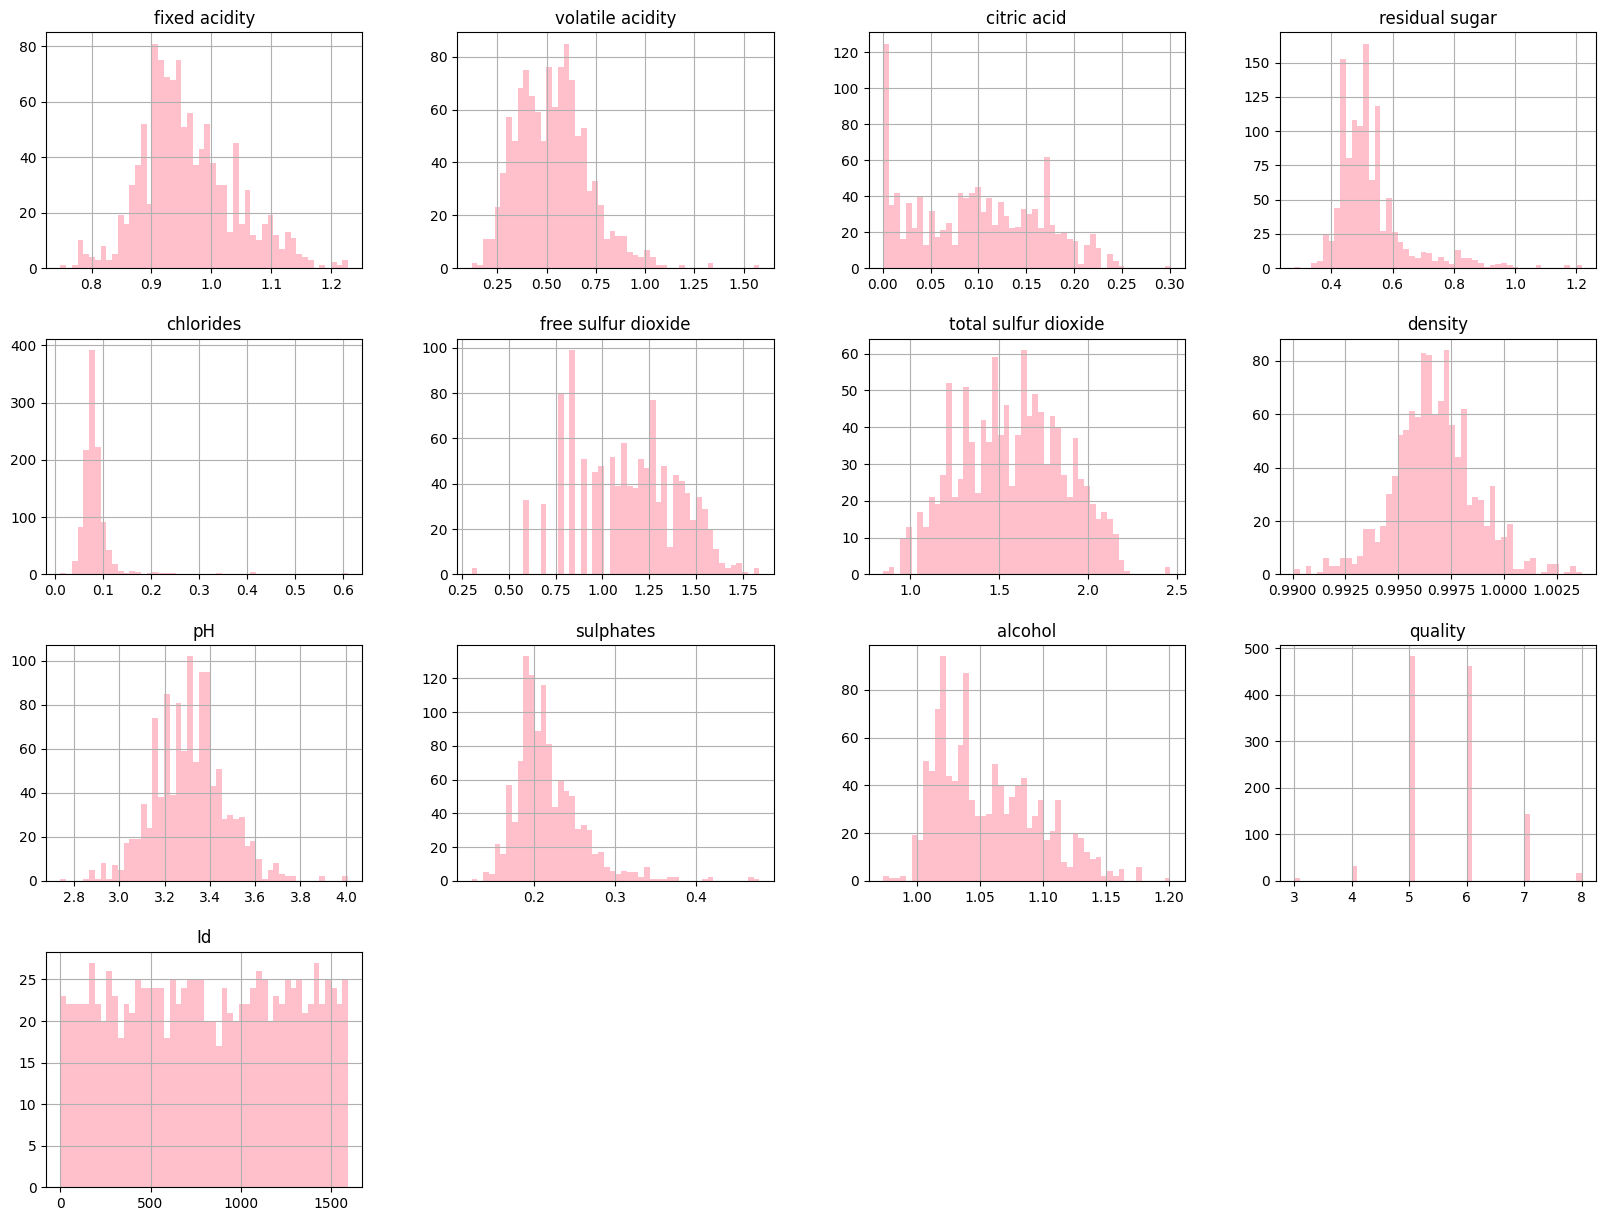

In [9]:
import numpy as np
df['citric acid'] = np.log10(df['citric acid'] + 1)
df['fixed acidity'] = np.log10(df['fixed acidity'] + 1)
df['residual sugar'] = np.log10(df['residual sugar'] + 1)
df['free sulfur dioxide'] = np.log10(df['free sulfur dioxide'] + 1)
df['total sulfur dioxide'] = np.log10(df['total sulfur dioxide']+ 1)
df['sulphates'] = np.log10(df['sulphates']+ 1)
df['alcohol'] = np.log10(df['alcohol'] + 1)

df.hist(bins=50,figsize=(20,15),color='pink')
plt.show()

### Separate X and Y features

In [10]:
X  = df.drop(columns=['Id','quality'],axis=1)
Y = df[['quality']]

In [59]:
Y['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Create a preprocessing pipeline to handle missing values and also perform standardization of numeric data 

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
pre = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                      ('scaler',StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = pre.fit_transform(X)
X_pre.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.486196,0.939332,-1.470646,-0.575154,-0.231395,-0.226243,-0.102011,0.555854,1.270695,-0.597422,-0.995667
1,-0.225126,1.941813,-1.470646,0.236097,0.234247,1.020212,0.878626,0.036165,-0.708928,0.191887,-0.583698
2,-0.225126,1.273492,-1.215286,-0.090362,0.107253,0.237528,0.565349,0.140103,-0.325775,-0.000025,-0.583698
3,1.608220,-1.399789,1.424631,-0.575154,-0.252560,0.427405,0.718227,0.659792,-0.964363,-0.461741,-0.583698
4,-0.486196,0.939332,-1.470646,-0.575154,-0.231395,-0.226243,-0.102011,0.555854,1.270695,-0.597422,-0.995667


### Split the dataset into training and testing data

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [15]:
xtrain.shape

(914, 11)

In [16]:
xtest.shape

(229, 11)

In [17]:
ytrain.shape

(914, 1)

In [18]:
ytest.shape

(229, 1)

In [19]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1,l1_ratio=0.5,random_state=42)
model.fit(xtrain,ytrain)

ElasticNet(alpha=1, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate_metrics(actual,pred):
    mse = mean_squared_error(actual,pred)
    mae = mean_absolute_error(actual,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual,pred)

    return mse,mae,rmse,r2


In [21]:
ypred = model.predict(xtest)
ypred[:5]

array([5.70021882, 5.70021882, 5.70021882, 5.70021882, 5.70021882])

In [22]:
(MSE,MAE,RMSE,R2) = evaluate_metrics(ytest,ypred)
print(f'MSE:{MSE}\nMAE:{MAE}\nRMSE:{RMSE}\nR2_SCORE:{R2}')

MSE:0.7154217749222759
MAE:0.709630875369077
RMSE:0.8458260902350293
R2_SCORE:-0.06942116466276382


#### Model is performing very bad

## Hyperparameter tuning

In [23]:
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [24]:
from sklearn.model_selection import GridSearchCV
m = ElasticNet()
gscv = GridSearchCV(m,parametersGrid,cv=5,scoring='r2')
gscv.fit(xtrain,ytrain)

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+02, tolerance: 4.778e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+02, tolerance: 4.858e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+02, tolerance: 4.522e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+02, tolerance: 4.340e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             scoring='r2')

In [25]:
gscv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 10}

In [26]:
best_elastic = gscv.best_estimator_
best_elastic

ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=10)

### Evaluate the model

In [27]:
best_elastic.score(xtrain,ytrain)

0.39156819583142843

In [28]:
best_elastic.score(xtest,ytest)

0.27121363850819435

## Model is performing worse. Lets try Random Forest regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=20,
                               criterion='squared_error',
                               max_depth=100,
                               min_samples_split=5,
                               min_samples_leaf=10)
model2.fit(xtrain,ytrain)

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=100, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=20)

In [30]:
model2.score(xtrain,ytrain)

0.6429779245706579

In [31]:
model2.score(xtest,ytest)

0.3240349014937911

In [52]:
params = {'n_estimators':[10,50,80,100,200,300,500],
          'max_depth':[10,20,30,50,100,150],
          'min_samples_split':[2,5,8,10,15,20]}
from sklearn.model_selection import RandomizedSearchCV
m1 = RandomForestRegressor()
rscv = RandomizedSearchCV(m1,params,scoring='neg_mean_squared_error',cv=5)
rscv.fit(xtrain,ytrain)

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 50, 100, 150],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [10, 50, 80, 100, 200,
                                                         300, 500]},
                   scoring='neg_mean_squared_error')

In [53]:
rscv.best_params_

{'n_estimators': 80, 'min_samples_split': 2, 'max_depth': 30}

In [54]:
rfr = rscv.best_estimator_
rfr

RandomForestRegressor(max_depth=30, n_estimators=80)

In [55]:
rfr.score(xtrain,ytrain)

0.9299486029977811

In [56]:
rfr.score(xtest,ytest)

0.3215372377572544

Model is performing very low. Let's try KNN since the dataset is small

In [32]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=31)
model3.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=31)

In [34]:
model3.score(xtrain,ytrain)

0.3887145788343158

Model is performing very low. Let's try KNN since the dataset is small

In [36]:
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf')
model_svr.fit(xtrain,ytrain)

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
model_svr.score(xtrain,ytrain)

0.6103783503641219

Model is performing very low

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb =GradientBoostingRegressor(learning_rate=0.1,n_estimators=500,min_samples_split=5,min_samples_leaf=5,max_depth=1)
model_gb.fit(xtrain,ytrain)

d:\anaconda1\envs\mlproj\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                          n_estimators=500)

In [47]:
model_gb.score(xtrain,ytrain)

0.5236001998558716